In [15]:
import pandas as pd

In [16]:
pops = pd.read_csv("data/state_pops.csv")
pops['year']=pops['year'].replace([" "],[None])
pops

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
2,AL,2011,4801627.0
3,AL,2009,4757938.0
4,AL,2013,4833722.0
...,...,...,...
1267,USA,2013,316128839.0
1268,USA,2009,306771529.0
1269,USA,2010,309326295.0
1270,USA,2011,311582564.0


In [41]:
pops.sort_index().loc[:,1990,:]

IndexingError: Too many indexers

In [42]:
pops.sort_index().loc[:,1990:1991,:]

IndexingError: Too many indexers

In [43]:
pops.sort_index().loc[:,[2013],:]

IndexingError: Too many indexers

In [44]:
pops[pops["population"]%2==0].sort_index()

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
3,AL,2009,4757938.0
4,AL,2013,4833722.0
5,AL,2007,4672840.0
...,...,...,...
1256,USA,1998,275854116.0
1262,USA,2004,292805298.0
1264,USA,2006,298379912.0
1266,USA,2008,304093966.0


In [33]:
titanic = pd.read_csv("data/titanic.csv")
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [58]:
titanic['age'] = titanic['age'].replace(['?'],[None]).astype('float')
titanic['fare'] = titanic['fare'].replace(['?'],[None]).astype('float')

In [23]:
df = titanic.groupby("sex").agg({"age": ["min", "max","mean"],"fare":["min","max"], "survived": "mean"} )
df

age                   fare            survived
           min   max       mean   min       max      mean
sex                                                      
female  0.1667  76.0  28.687071  6.75  512.3292  0.727468
male    0.3333  80.0  30.585233  0.00  512.3292  0.190985

In [24]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='pclass,sex'>

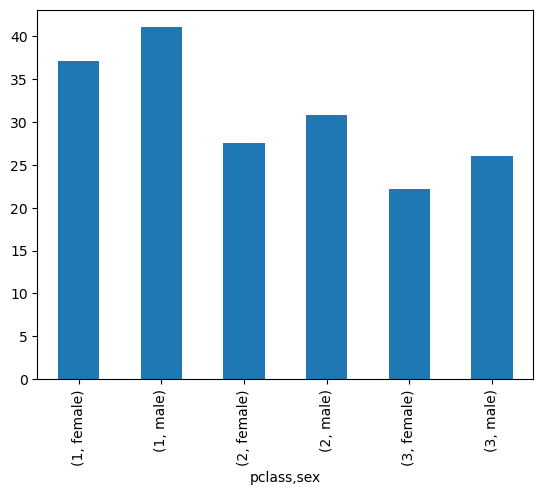

In [25]:
titanic.groupby(['pclass','sex'])["age"].mean().plot(kind = "bar")

In [26]:
titanic.groupby(["pclass", "sex"])["age"].mean().unstack()

sex,female,male
pclass,,
1,37.037594,41.029250
2,27.499191,30.815401
3,22.185307,25.962273


<AxesSubplot:xlabel='pclass'>

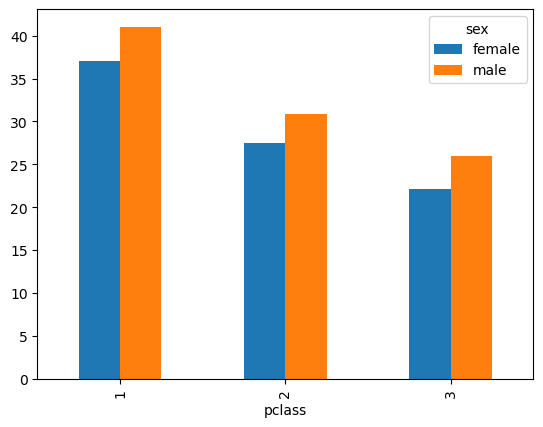

In [27]:
titanic.groupby(['pclass','sex'])["age"].mean().unstack().plot(kind = "bar")

<AxesSubplot:xlabel='sex'>

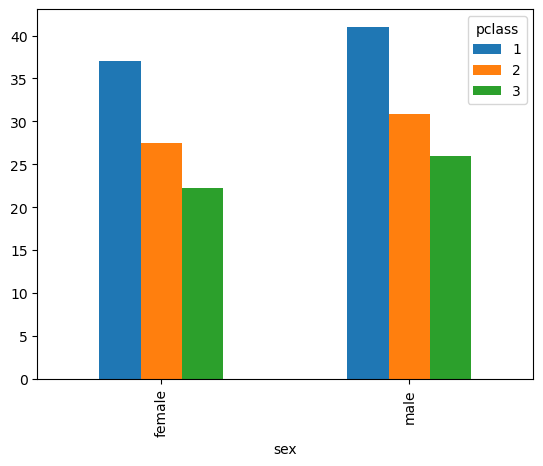

In [28]:
titanic.groupby(['sex','pclass'])['age'].mean().unstack().plot(kind = "bar")

<AxesSubplot:xlabel='sex'>

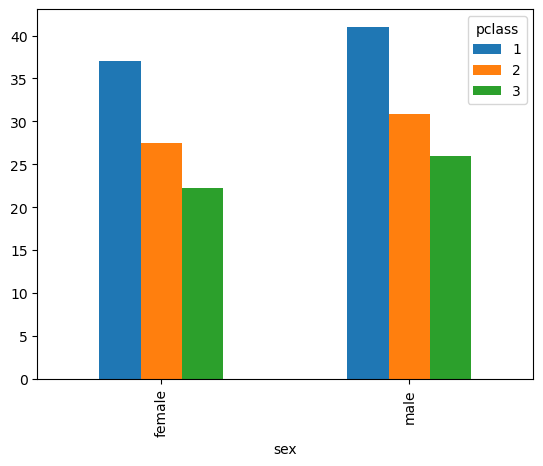

In [29]:
titanic.groupby(["pclass", "sex"])["age"].mean().unstack(level="pclass").plot(kind="bar")

In [47]:
titanic.groupby(["sex",])["age"].mean()

sex     survived
female  0           25.255208
        1           29.815354
male    0           31.516412
        1           26.977778
Name: age, dtype: float64

In [48]:
titanic.groupby(["sex","survived"])["age"].mean().unstack()

survived,0,1
sex,,
female,25.255208,29.815354
male,31.516412,26.977778


<AxesSubplot:xlabel='sex'>

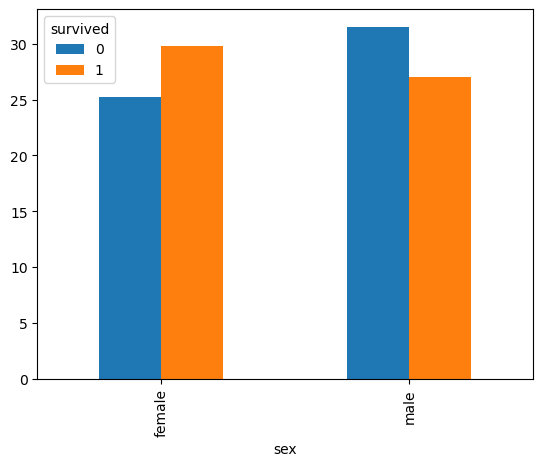

In [55]:
titanic.groupby(['sex','survived'])["age"].mean().unstack().plot(kind = "bar")

In [56]:
df = titanic.groupby(['sex','survived'])["age"].mean()

<AxesSubplot:xlabel='sex'>

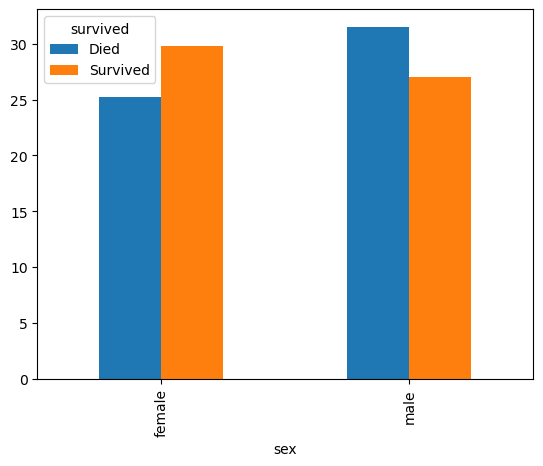

In [57]:
df.unstack().rename(columns={0: "Died",1:"Survived"}).plot(kind = 'bar')